# Telco Customer Churn - Exploratory Data Analysis

This notebook explores the Telco Customer Churn dataset to understand the factors driving customer attrition.

**Goals:**
- Understand dataset structure.
- specific insights into churn distribution.
- Identify key drivers (features) of churn.
- Analyze correlations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## 1. Dataset Overview
Loading the data and fixing the `TotalCharges` column which contains some empty strings.

In [3]:
# Load Data
data_path = r"E:\Microsoft\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Fix TotalCharges (coerce errors to NaN, then fill with 0 or drop)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Convert Churn to binary for easier analysis later (No -> 0, Yes -> 1)
df['ChurnBinary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7043, 22)


C:\Users\kumar\AppData\Local\Temp\ipykernel_8900\3851360512.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insight:**
The dataset contains over 7000 customer records. Most features are categorical (text), like 'PaymentMethod', 'Contract', etc. 'TotalCharges', 'MonthlyCharges', and 'Tenure' are key numerical features.

## 2. Churn Distribution
How many customers are actually leaving?

C:\Users\kumar\AppData\Local\Temp\ipykernel_8900\352892743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


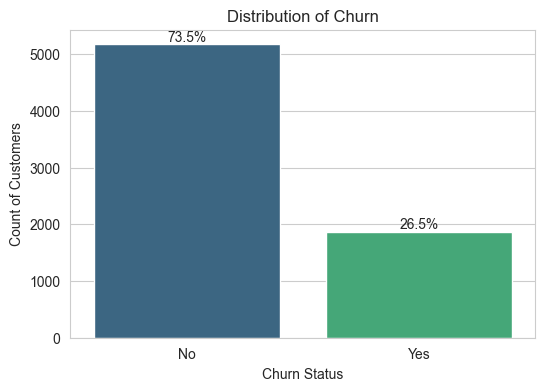

In [5]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count of Customers')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

**Insight:**
About **26.5%** of customers in this dataset have churned. This indicates a class imbalance, which is typical in churn datasets (more people stay than leave).

## 3. Feature vs Churn Visualizations
Let's check how different categories relate to churn.

### 3.1 Contract Type and Churn
Does the contract type affect loyalty?

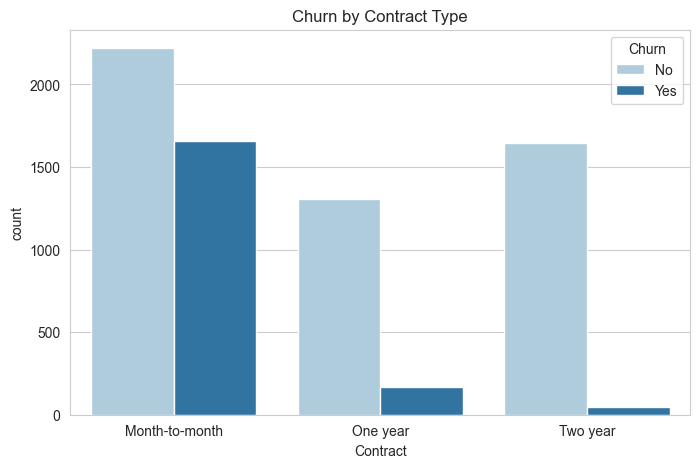

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Paired')
plt.title('Churn by Contract Type')
plt.show()

**Insight:**
- Customers with **Month-to-month** contracts have a VERY high churn rate.
- One and Two-year contract holders rarely churn. Long-term contracts secure loyalty.

### 3.2 Tenure vs Churn
Do new customers leave more often?

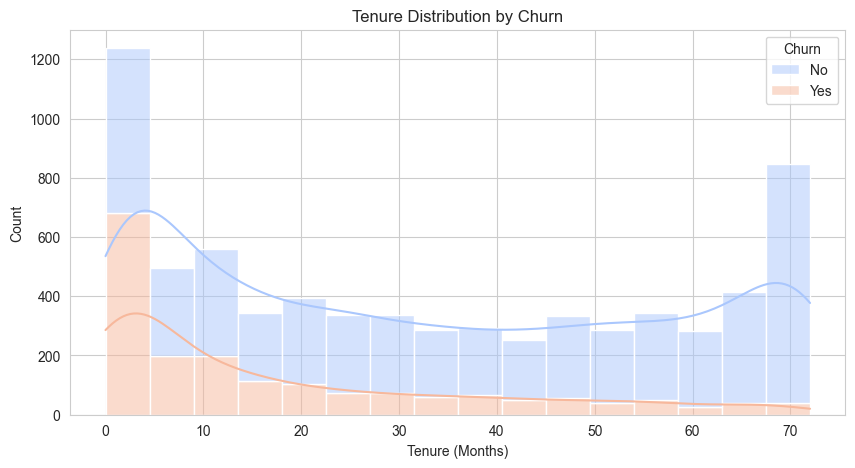

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.show()

**Insight:**
- New customers (low tenure, < 10 months) produce the highest churn.
- As tenure increases, customers become much more stable.

### 3.3 Monthly Charges vs Churn
Is price a factor?

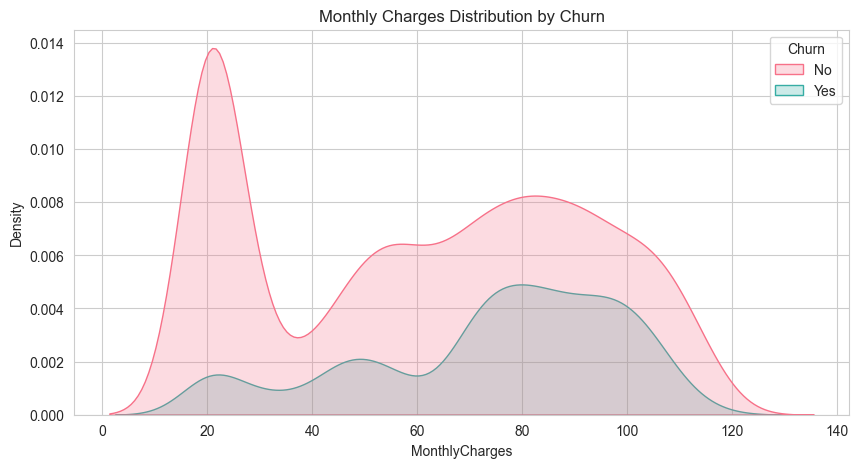

In [8]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette='husl')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

**Insight:**
- Higher monthly charges are associated with higher churn (the orange peak is further to the right).
- Customers paying small amounts (likely basic service) are very stable.

## 4. Correlation Heatmap
Let's see the numerical correlations. We used the Binary Churn created earlier.

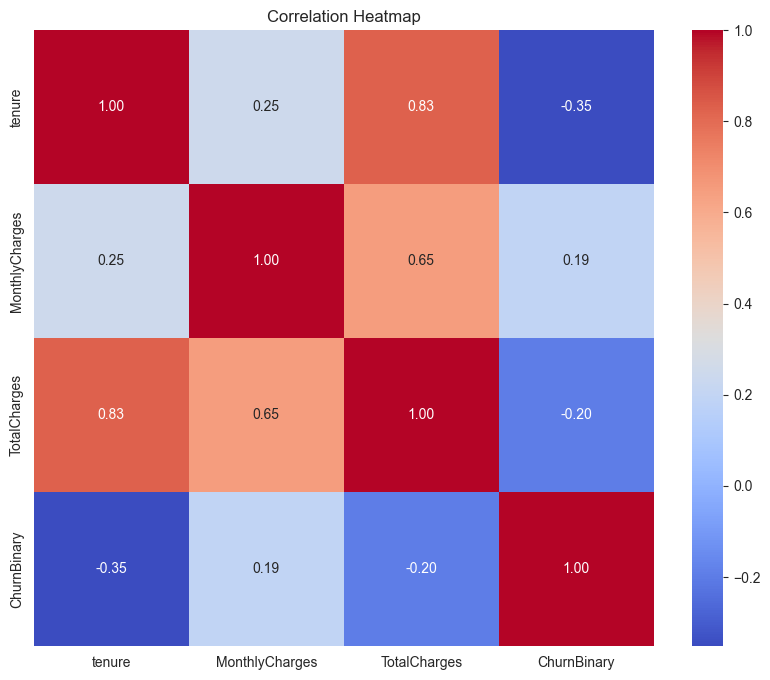

In [9]:
plt.figure(figsize=(10, 8))
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnBinary']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
- **Tenure** has a negative correlation with Churn (-0.35). Longer tenure = Less Churn.
- **MonthlyCharges** has a positive correlation (+0.19). Higher cost = More Churn.
- **TotalCharges** is highly correlated with Tenure (obviously), but has a slightly negative correlation with Churn overall.

## Summary of Findings
1. **Contract Types Matter**: Encouraging users to switch from Month-to-month to 1 or 2-year contracts could significantly reduce churn.
2. **New User Risk**: The first few months are critical. Onboarding or incentives for new users might help.
3. **Pricing Sensitivity**: Higher monthly bills correlate with attrition. Value-for-money offers might help retain high-paying customers.